In [16]:
import numpy as np 
import pandas as pd
import pickle



In [2]:
df=pd.read_csv('CLEAN- PCOS SURVEY SPREADSHEET.csv')

In [3]:
df.head()

,Age (in Years),Weight (in Kg),Height (in Cm / Feet),Can you tell us your blood group ?,After how many months do you get your periods?\n(select 1- if every month/regular),Have you gained weight recently?,Do you have excessive body/facial hair growth ?,Are you noticing skin darkening recently?,Do have hair loss/hair thinning/baldness ?,Do you have pimples/acne on your face/jawline ?,Do you eat fast food regularly ?,Do you exercise on a regular basis ?,Have you been diagnosed with PCOS/PCOD?,Do you experience mood swings ?,Are your periods regular ?,"How long does your period last ? (in Days)\nexample- 1,2,3,4....."
0,21,47.0,168.0,13,1,0,0,0,0,0,0,0,0,1,1,6
1,21,45.0,156.0,11,1,0,0,1,1,1,0,0,0,1,1,4
2,17,37.0,162.0,15,1,0,0,0,0,1,1,0,0,1,1,6
3,28,54.0,160.0,15,1,0,0,0,0,0,0,0,0,1,1,4
4,45,40.0,150.0,13,2,0,0,0,1,0,0,0,1,1,0,7


In [4]:
df.isnull().sum()

Age (in Years)                                                                        0
Weight (in Kg)                                                                        0
Height (in Cm / Feet)                                                                 0
Can you tell us your blood group ?                                                    0
After how many months do you get your periods?\n(select 1- if every month/regular)    0
Have you gained weight recently?                                                      0
Do you have excessive body/facial hair growth ?                                       0
Are you noticing skin darkening recently?                                             0
Do have hair loss/hair thinning/baldness ?                                            0
Do you have pimples/acne on your face/jawline ?                                       0
Do you eat fast food regularly ?                                                      0
Do you exercise on a regular bas

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age (in Years)                                                                     465 non-null    int64  
 1   Weight (in Kg)                                                                     465 non-null    float64
 2   Height (in Cm / Feet)                                                              465 non-null    float64
 3   Can you tell us your blood group ?                                                 465 non-null    int64  
 4   After how many months do you get your periods?
(select 1- if every month/regular)  465 non-null    int64  
 5   Have you gained weight recently?                                                   465 non-null    int64  

In [6]:
df.isnull().sum()  #No Null values

Age (in Years)                                                                        0
Weight (in Kg)                                                                        0
Height (in Cm / Feet)                                                                 0
Can you tell us your blood group ?                                                    0
After how many months do you get your periods?\n(select 1- if every month/regular)    0
Have you gained weight recently?                                                      0
Do you have excessive body/facial hair growth ?                                       0
Are you noticing skin darkening recently?                                             0
Do have hair loss/hair thinning/baldness ?                                            0
Do you have pimples/acne on your face/jawline ?                                       0
Do you eat fast food regularly ?                                                      0
Do you exercise on a regular bas

In [7]:
df.nunique()

Age (in Years)                                                                        41
Weight (in Kg)                                                                        62
Height (in Cm / Feet)                                                                 42
Can you tell us your blood group ?                                                     6
After how many months do you get your periods?\n(select 1- if every month/regular)     3
Have you gained weight recently?                                                       2
Do you have excessive body/facial hair growth ?                                        2
Are you noticing skin darkening recently?                                              2
Do have hair loss/hair thinning/baldness ?                                             2
Do you have pimples/acne on your face/jawline ?                                        2
Do you eat fast food regularly ?                                                       2
Do you exercise on a 

In [8]:
df['Can you tell us your blood group ?'].unique()

array([13, 11, 15, 12, 14, 16], dtype=int64)

In [9]:
unique_values = df.apply(lambda col: col.unique())
print(unique_values)


Age (in Years)                                                                        [21, 17, 28, 45, 16, 20, 40, 38, 34, 27, 18, 2...
Weight (in Kg)                                                                        [47.0, 45.0, 37.0, 54.0, 40.0, 70.0, 48.0, 55....
Height (in Cm / Feet)                                                                 [168.0, 156.0, 162.0, 160.0, 150.0, 167.0, 147...
Can you tell us your blood group ?                                                                             [13, 11, 15, 12, 14, 16]
After how many months do you get your periods?\n(select 1- if every month/regular)                                            [1, 2, 3]
Have you gained weight recently?                                                                                                 [0, 1]
Do you have excessive body/facial hair growth ?                                                                                  [0, 1]
Are you noticing skin darkening recently?       

In [10]:
df = df.rename(columns={
    "Age (in Years)": "Age",  
    "Weight (in Kg)": "Weight",  
    "Height (in Cm / Feet)": "Height",  
    "Can you tell us your blood group ?": "Blood Group",  
    "After how many months do you get your periods?\n(select 1- if every month/regular)": "Menstrual Cycle Interval",  
    "Have you gained weight recently?": "Recent Weight Gain",  
    "Are you noticing skin darkening recently?": "Skin Darkening",  
    "Do have hair loss/hair thinning/baldness ?": "Hair Loss",  
    "Do you have pimples/acne on your face/jawline ?": "Acne",  
    "Do you eat fast food regularly ?": "Regular Fast Food Consumption",  
    "Do you exercise on a regular basis ?": "Regular Exercise",  
    "Have you been diagnosed with PCOS/PCOD?": "PCOS Diagnosis",  
    "Do you experience mood swings ?": "Mood Swings",  
    "Are your periods regular ?": "Regular Periods",  
    "Do you have excessive body/facial hair growth ?": "Excessive Body/Facial Hair",  
    "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Menstrual Duration (Days)"  
})


In [11]:
df['PCOS Diagnosis'].value_counts()

0    363
1    102
Name: PCOS Diagnosis, dtype: int64

In [12]:
df['Regular Periods'].value_counts()

1    365
0    100
Name: Regular Periods, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['PCOS Diagnosis'])
Y= df['PCOS Diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [14]:
def calculate_metrics(model,X_test,Y_test):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import auc

    Yhat=model.predict(X_test)
    Y_proba=model.predict_proba(X_test)[:,1]

    acc=accuracy_score(Y_test,Yhat)
    prec=precision_score(Y_test,Yhat,pos_label=1)
    rec=recall_score(Y_test,Yhat,pos_label=1)
    f1=f1_score(Y_test,Yhat,pos_label=1)
    auc_roc=roc_auc_score(Y_test,Y_proba)
    precision, recall, _ = precision_recall_curve(Y_test,Y_proba,pos_label=1)

    aupr=auc(recall,precision)

    metrics=pd.DataFrame(index=['Model'],columns=['Acc', 'Prec', 'Rec', 'F1', 'AUC', 'AUPR'])


    metrics.at['Model', 'Acc'] = acc
    metrics.at['Model', 'Prec'] = prec
    metrics.at['Model', 'Rec'] = rec
    metrics.at['Model', 'F1'] = f1
    metrics.at['Model', 'AUC'] = auc_roc
    metrics.at['Model', 'AUPR'] = aupr

    return metrics

In [68]:
## Applying Randrom Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:

with open("pcos_randomforest1.pkl", "wb") as file:
    pickle.dump(rf, file) 


In [17]:
with open("pcos_randomforest1.pkl", "rb") as file:
    model = pickle.load(file)

In [19]:
metrics=calculate_metrics(model,X_test,Y_test)
print(metrics)

            Acc Prec       Rec        F1       AUC      AUPR
Model  0.846154  1.0  0.357143  0.526316  0.815811  0.702924


In [20]:
Yhat=model.predict(X_test)
Yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [74]:
##Using Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=10)

dt.fit(X_test,Yhat)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

In [30]:
import pickle

with open("pcos_decisiontree1.pkl", "wb") as file:
    pickle.dump(dt, file)  

In [31]:

with open("pcos_decisiontree1.pkl", "rb") as file:
    model = pickle.load(file)




[Text(0.6, 0.8333333333333334, 'Regular Periods <= 0.5\nentropy = 0.421\nsamples = 117\nvalue = [107, 10]\nclass = no'),
 Text(0.4, 0.5, 'Recent Weight Gain <= 0.5\nentropy = 0.988\nsamples = 23\nvalue = [13, 10]\nclass = no'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]\nclass = no'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 12\nvalue = [4, 8]\nclass = yes'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 94\nvalue = [94, 0]\nclass = no')]

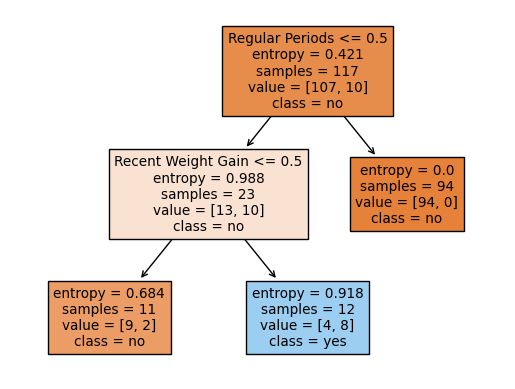

In [32]:
from sklearn import tree

tree.plot_tree(model,feature_names=X.columns,class_names=['no','yes'],filled=True)

In [33]:
metrics=calculate_metrics(model,X_test,Y_test)
metrics


,Acc,Prec,Rec,F1,AUC,AUPR
Model,0.846154,0.916667,0.392857,0.55,0.800762,0.771384


In [80]:
#stacking of random forest and decision tree


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

rf = RandomForestClassifier().fit(X_train, Y_train)

Yhat = cross_val_predict(rf, X, Y, cv=10)

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 10)
dt.fit(X, Yhat)
Y_hat=dt.predict(X_test)


In [40]:
import pickle

# Save the trained model
with open("pcos_stacking_rf_dt.pkl", "wb") as file:
    pickle.dump(dt, file)  


In [41]:
# Load the saved model
with open("pcos_stacking_rf_dt.pkl", "rb") as file:
    model = pickle.load(file)




In [42]:
metrics=calculate_metrics(model,X_test,Y_test)
metrics

,Acc,Prec,Rec,F1,AUC,AUPR
Model,0.863248,0.833333,0.535714,0.652174,0.804173,0.697624


In [85]:
# SVM + Logistic Regression

In [86]:
from sklearn.svm import SVC

In [87]:
svm= SVC(kernel='linear', probability=True).fit(X_train, Y_train)

In [88]:
import pickle


with open("pcos_svm1.pkl", "wb") as file:
    pickle.dump(model, file) 


In [43]:

with open("pcos_svm1.pkl", "rb") as file:
    model = pickle.load(file)



In [44]:
metrics=calculate_metrics(model,X_test,Y_test)

In [45]:
metrics

,Acc,Prec,Rec,F1,AUC,AUPR
Model,0.871795,0.809524,0.607143,0.693878,0.777087,0.689015


In [46]:
Yhat=model.predict(X_test)
Yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [93]:
#stacking of SVM and Logistic Regression

In [94]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

svm = SVC(kernel='linear', probability=True).fit(X_train, Y_train)

Yhat = cross_val_predict(svm, X, Y, cv=10)

lr = LogisticRegression(max_iter = 1000).fit(X, Yhat)

In [95]:
import pickle


with open("pcos_stacking_svm_lr.pkl", "wb") as file:
    pickle.dump(lr, file)  


In [47]:

with open("pcos_stacking_svm_lr.pkl", "rb") as file:
    model = pickle.load(file)




In [49]:
metrics=calculate_metrics(model,X_test,Y_test)
metrics

,Acc,Prec,Rec,F1,AUC,AUPR
Model,0.871795,0.782609,0.642857,0.705882,0.797352,0.715286


In [50]:
coef = pd.DataFrame(model.coef_)
coef.columns = X.columns

print(coef)

        Age    Weight    Height  Blood Group  Menstrual Cycle Interval  \
0 -0.010501 -0.000041  0.001277     0.037186                  1.480948   

   Recent Weight Gain  Excessive Body/Facial Hair  Skin Darkening  Hair Loss  \
0            0.324024                    0.213596        0.097246  -0.120836   

       Acne  Regular Fast Food Consumption  Regular Exercise  Mood Swings  \
0  0.126858                      -0.190589         -0.031649     0.160034   

   Regular Periods  Menstrual Duration (Days)  
0        -5.907471                  -0.067598  


In [99]:
#using random forest with 100 decision trees

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train,Y_train)

In [101]:
import pickle


with open("pcos_rf2.pkl", "wb") as file:
    pickle.dump(rf, file)  


In [51]:

with open("pcos_rf2.pkl", "rb") as file:
    model = pickle.load(file)



In [52]:
metrics=calculate_metrics(rf,X_test,Y_test)
metrics

,Acc,Prec,Rec,F1,AUC,AUPR
Model,0.846154,1.0,0.357143,0.526316,0.827849,0.717942


Text(0.5, 1.0, 'Correlation heatmap of features')

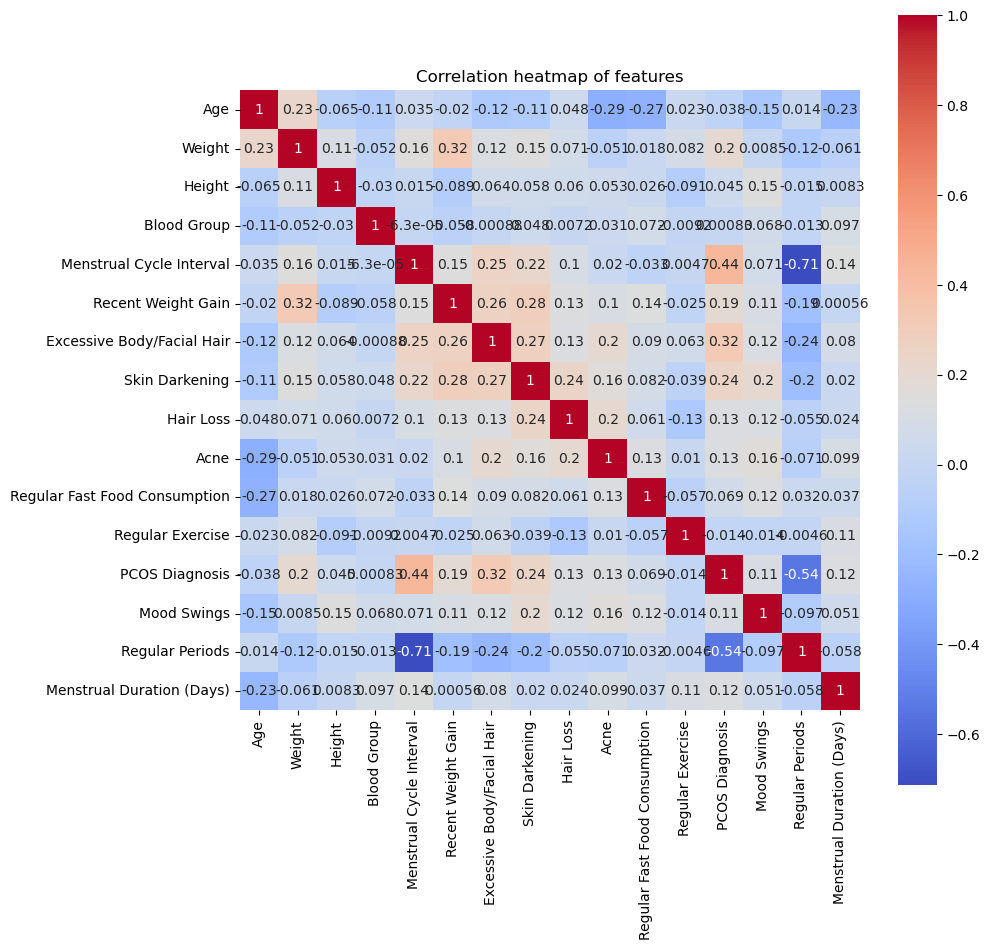

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',square=True)

plt.title("Correlation heatmap of features")


When looking at the correlation matrix, we can see that while some features have a small correlation, the relationship between regular menstruation and cycle interval is strong.

This strong correlation might bias the feature importance analysis because the model may rely too much on these features.

To check if this bias is affecting the model, I analyzed the Feature Importance (FPI) for the entire model and also separately for each class (PCOS and non-PCOS).

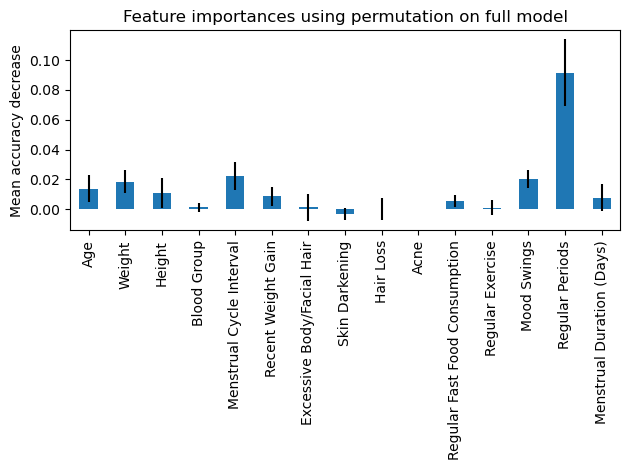

In [54]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result=permutation_importance(rf,X_test,Y_test,n_repeats=30,random_state=0)

forest_importances=pd.Series(result.importances_mean,index=X.columns)

fig,ax=plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std,ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

fig.tight_layout()
plt.show()

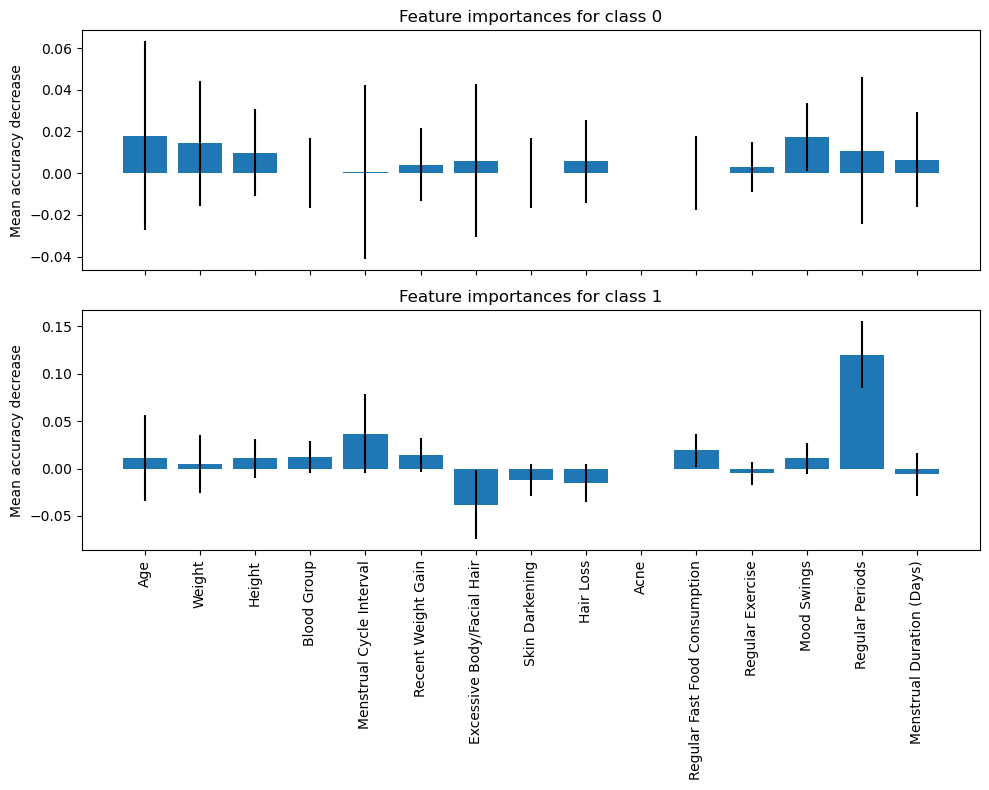

In [55]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

class_0_importances={}
class_1_importances={}

for class_label in [0,1]:

    X_test_class =X_test[Y_test==class_label]
    Y_test_class=Y_test[Y_test==class_label]

    result=permutation_importance(rf,X_test_class,Y_test_class,n_repeats=30,random_state=0)

    if class_label==0:

        class_0_importances=result.importances_mean

    else:
        class_1_importances=result.importances_mean

fig,axs=plt.subplots(2,1,figsize=(10,8),sharex=True)

axs[0].bar(X.columns,class_0_importances,yerr=result.importances_std)

axs[0].set_title("Feature importances for class 0")

axs[0].set_ylabel("Mean accuracy decrease")

axs[1].bar(X.columns, class_1_importances, yerr=result.importances_std)
axs[1].set_title("Feature importances for class 1")
axs[1].set_ylabel("Mean accuracy decrease")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



## Important insights from the data

Irregular Menstrual Cycles and Regular Periods are the Strongest Indicators of PCOS.

These features contribute the most to the classification model.

If a patient reports irregular periods, there is a high chance they have PCOS.

Weight Gain and Excessive Facial Hair are Critical Factors.

These symptoms align with clinical findings on PCOS, where weight gain and hirsutism are commonly observed.

Mood Swings and Acne Suggest Hormonal Imbalance.

PCOS affects emotional and skin health, reinforcing the importance of hormonal balance in diagnosis.

Certain Features are Redundant.

Blood Group, Height, and Regular Exercise show minimal influence.

These might be removed in further model improvements.

##Partial Dependence Plots (PDPs) e Individual Conditional Expectation (ICE) plots

The Sklearn library provides a single function to estimate PDPs (Partial Dependence Plots) and ICE (Individual Conditional Expectation) plots from trained models: PartialDependenceDisplay.from_estimator().

The function's main arguments include the estimator (trained model), the dataset on which the analysis will be performed, and the features to be analyzed. Additionally, it has other parameters.

In particular, the "kind" parameter specifies whether the plot will be of type:

ICE (individual),

PDP (average effect),

or both.

It is also important to define categorical features using the "categorical_features" parameter.

For categorical variables, it is not possible to generate ICE curves; instead, a bar chart representing partial dependence is displayed.

In [56]:
from sklearn.inspection import PartialDependenceDisplay

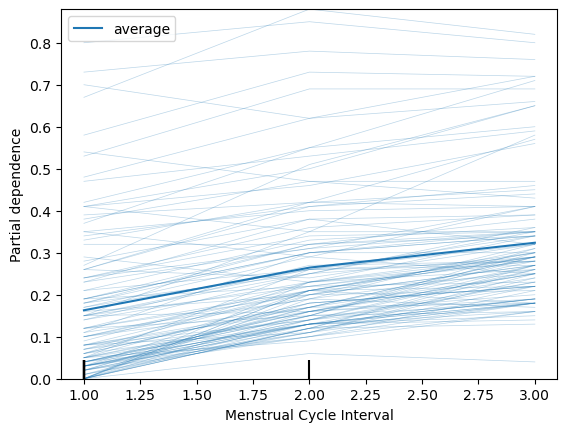

In [57]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [4], kind='both', target=1)

#insights from above image


✔ Menstrual Cycle Interval is an important predictor of PCOS.
✔ Longer intervals between menstrual cycles increase the probability of PCOS.
✔ There is individual variation, but the general trend is consistent.
✔ PDP helps understand the overall trend, while ICE highlights variability.